기울기:  [[0.63482159]]
절편:  [0.12628453]
결정계수:  0.1064571423759525


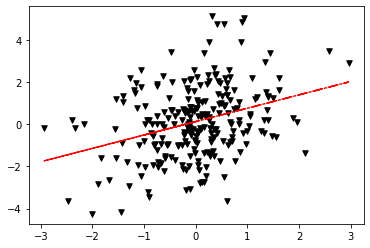

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# 데이터를 읽어옴
h_stock = pd.read_csv('H_stock.csv') # H company
s_stock = pd.read_csv('S_stock.csv') # S company
k_index = pd.read_csv('K_index.csv') # KOSPI

# 헤더정보 제거
h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

# 선형회귀모델 함수에 넣기 위해 reshape으로 차원 조정 [예: (248,) --> (248,1)]
h_rate = h_rate.reshape(h_rate.shape[0], 1)
s_rate = s_rate.reshape(s_rate.shape[0], 1)
k_rate = k_rate.reshape(k_rate.shape[0], 1)

plt.scatter(k_rate, h_rate, c='black', s=30, marker='v', label='train')

model = linear_model.LinearRegression() # 모델 생성
model.fit(k_rate, h_rate) # 모델 훈련

plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='h stock', c='red')

print('기울기: ', model.coef_)
print('절편: ', model.intercept_)
print('결정계수: ', model.score(k_rate, h_rate))

In [10]:
h_stock

,date,h_price,h_rate
0,2015-03-25,45500,NaN
1,2015-03-26,45900,0.879
2,2015-03-27,45000,-1.961
3,2015-03-30,45600,1.333
4,2015-03-31,46000,0.877
...,...,...,...
244,2016-03-21,60100,0.839
245,2016-03-22,59200,-1.498
246,2016-03-23,58900,-0.507
247,2016-03-24,59300,0.679


기울기:  [[1.00132771]]
절편:  [-0.03500143]
결정계수:  0.2644483831226938


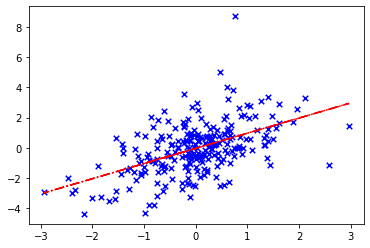

In [12]:
plt.scatter(k_rate, s_rate, c='blue', s=30, marker='x', label='s rate')

model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='h stock', c='red')

print('기울기: ', model.coef_)
print('절편: ', model.intercept_)
print('결정계수: ', model.score(k_rate, s_rate))

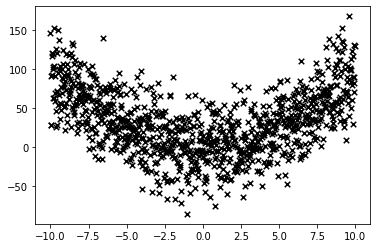

In [14]:
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 2차 회귀모형을 만들기 위한 가짜 데이터 random 생성 (표준정규분포)
x_train = np.arange(-10, +10, 1/50.).reshape(-1, 1)
x_train.shape
x_train2 = x_train**2 + np.random.randn(len(x_train), 1)*30

plt.scatter(x_train, x_train2, c='black', s=30, marker='x', label='sample')

# 회귀모형에 넣기 위한 트레이닝 데이터셋 만들기
X2_TRAIN = np.c_[x_train**2, x_train]

In [16]:
X2_TRAIN

array([[100.    , -10.    ],
       [ 99.6004,  -9.98  ],
       [ 99.2016,  -9.96  ],
       ...,
       [ 98.8036,   9.94  ],
       [ 99.2016,   9.96  ],
       [ 99.6004,   9.98  ]])

기울기:  [[ 0.95712529 -0.16154635]]
절편:  [0.59030138]
결정계수:  0.47851984423330496


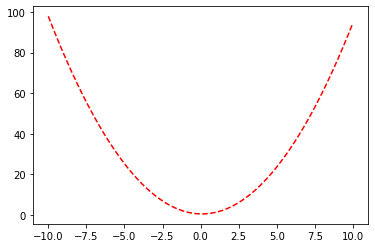

In [21]:
model = linear_model.LinearRegression() # 모델 생성
model.fit(X2_TRAIN, x_train2) # 모델 학습

# 모델을 사용해 예측
# plt.scatter(x_train, x_train2, c='black', s=30, marker='x', label='sample')
plt.plot(x_train, model.predict(X2_TRAIN), linestyle='--', label='sample', c='red')

print('기울기: ', model.coef_)
print('절편: ', model.intercept_)
print('결정계수: ', model.score(X2_TRAIN, x_train2))